In [1]:
%matplotlib inline
from math import sqrt
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

from multiprocessing import Process, Value, Array
from multiprocessing import Pool

In [2]:
class vector:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
    def __mul__(self, other):
        if type(other) == type(self):
            return self.dot(other)
        else:
            return vector(self.x * other, self.y * other, self.z * other)
    def __rmul__(self, other):
        return self.__mul__(other)
    def dot(self, other):
        return vector(self.x * other.x, self.y * other.y, self.z * other.z)
    def __sub__(self, other):
        return vector(self.x - other.x,self.y - other.y,self.z - other.z)
    def __neg__(self):
        return vector(-self.x,-self.y,-self.z)
    def __add__(self, other):
        return vector(self.x + other.x,self.y + other.y,self.z + other.z)
    def mag(self):
        n = self.x*self.x
        n += self.y*self.y
        n += self.z*self.z
        return sqrt(n)
    def mag2(self):
        n = self.x*self.x
        n += self.y*self.y
        n += self.z*self.z
        return abs(n)
    def norm(self):
        return vector(self.x/self.mag(),self.y/self.mag(),self.z/self.mag())            
    def __truediv__(self, other):
        if type(other) == type(self):
            pass
        else:
            return vector(self.x/other, self.y/other, self.z/other)
    def __repr__(self):
        return f'[{self.x},\t{self.y},\t{self.z}]'
    def __print__(self):
        return f'[{self.x},\t{self.y},\t{self.z}]'
    
class planet:
    def __init__(self, name="", pos=[0.0, 0.0, 0.0],velocity=[0.0, 0.0, 0.0], mass=0.0):
        self.name = name
        self.pos = vector(pos[0],pos[1],pos[2])
        self.mass = mass
        self.velocity = vector(velocity[0],velocity[1],velocity[2])
        self.trail_x = [pos[0]]
        self.trail_y = [pos[1]]
        self.trail_z = [pos[2]]
        self.force = vector(0.0,0.0,0.0)
    def update(self):
        self.trail_x.append(self.pos.x)
        self.trail_y.append(self.pos.y)
        self.trail_z.append(self.pos.z)
    def rhat(self):
        return -self.pos.norm()
    def __repr__(self):
        return f'{self.name}'
    def __print__(self):
        return f'{self.name}'
    
class simulation:
    def __init__(self, sun, planets=[], num=50000, dt=1.0):
        self.sun = sun
        self.planets = planets
        self.num = num
        self.dt = dt
        self.G = 6.67E-11
    def add_planet(self, planet):
        self.planets.append(planet)
    def run_plannet(self, p):
        for x in range(0, self.num):
            p.force = p.rhat() * (self.G * p.mass * self.sun.mass) / (p.pos.mag2())
            p.velocity = (p.mass * p.velocity + p.force * self.dt) / p.mass
            p.pos = p.pos + (p.velocity * self.dt)
            p.update()
        return p
    def run_mp(self):
        with Pool(processes=4) as pool:
            self.planets = pool.map(self.run_plannet, self.planets)
    def run(self):
        for p in self.planets:
            self.run_plannet(p)
    def plot(self):
        plt.figure(figsize=(15,15))
        axes = plt.gca()
        axes.set_xlabel('x in m')
        axes.set_ylabel('y in m')
        axes.plot(0,0,marker='o',markersize=1,color='red',label='Sun')
        for p in self.planets:
            axes.plot(p.trail_x, p.trail_y,label=p.name)
        plt.axis('equal')
        axes.legend()
        plt.show()
    def plot_3d(self):
        fig = plt.figure(figsize=(15,15))
        ax = fig.gca(projection='3d')
        ax.plot(self.sun.trail_x, self.sun.trail_y, self.sun.trail_z,marker='o',markersize=10, label='Sun')
        for p in self.planets:
            ax.plot(p.trail_x, p.trail_y, p.trail_z, label=p.name)
        plt.axis('equal')
        ax.legend()
        plt.show()

In [3]:
sun = planet(name="sun", mass=2.0E30)
planet1 = planet(name="p1", pos=[1.5E8,0, 0], velocity=[0, 5.0E5, 5.0E5], mass=6.0E24)
planet2 = planet(name="p2", pos=[8.0E8,0, 0], velocity=[0, 3.0E5, 0], mass=2.0E27)
planet3 = planet(name="p3", pos=[3.0E8,3.0E8, 3.0E8], velocity=[0, 2.0E5, 2.0E5], mass=2.0E27)
planet4 = planet(name="p4", pos=[2.0E8,2.0E8, 3.0E8], velocity=[0, 2.0E5, 0], mass=2.0E27)
planet5 = planet(name="p5", pos=[2.0E8,3.0E8, 3.0E8], velocity=[0, 2.0E5, 2.0E5], mass=2.0E27)
planet6 = planet(name="p6", pos=[5.0E8,3.0E8, 3.0E8], velocity=[0, 2.0E5, 2.0E5], mass=2.0E27)
planet7 = planet(name="p7", pos=[6.0E8,3.0E8, 3.0E8], velocity=[0, 2.0E5, 2.0E5], mass=2.0E27)
planet8 = planet(name="p8", pos=[7.0E8,3.0E8, 3.0E8], velocity=[0, 2.0E5, 2.0E5], mass=2.0E27)
planet9 = planet(name="p9", pos=[3.0E7,3.0E8, 3.0E8], velocity=[0, 2.0E5, 2.0E5], mass=2.0E27)

sim = simulation(sun, planets=[planet1,planet2,planet3,planet4,planet5,planet6,planet7,planet8], num=50000)

In [4]:
#%%time
#sim.run()
#sim.plot()

In [5]:
%%time
sim.run_mp()

CPU times: user 85 ms, sys: 55.9 ms, total: 141 ms
Wall time: 3.13 s


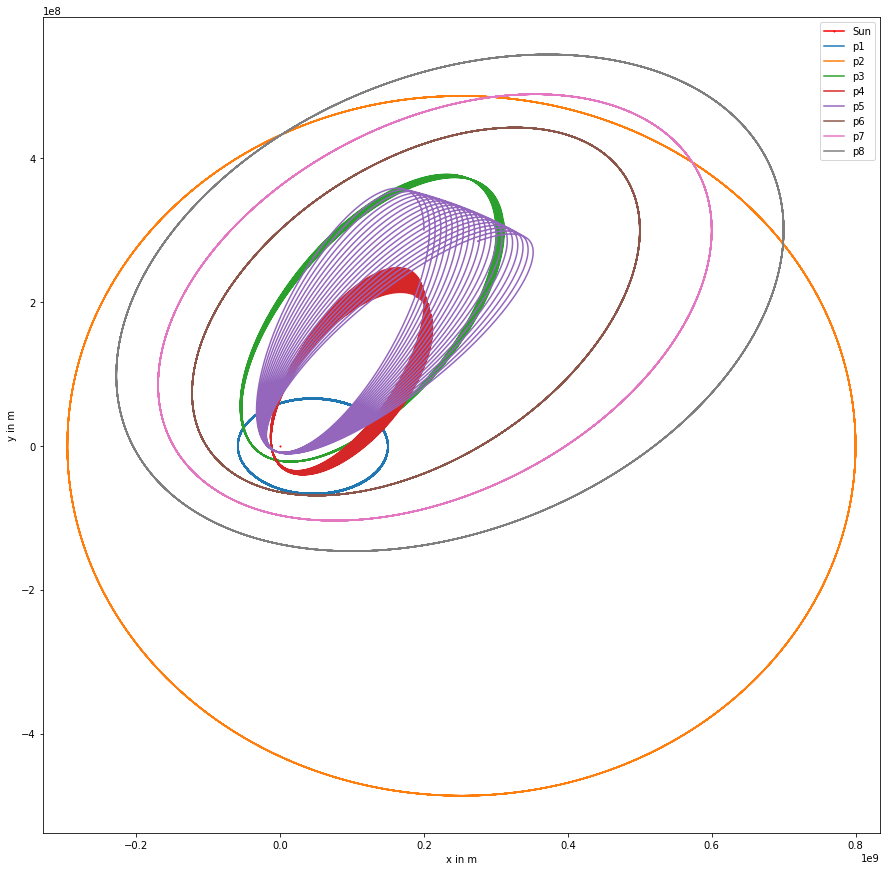

In [6]:
sim.plot()

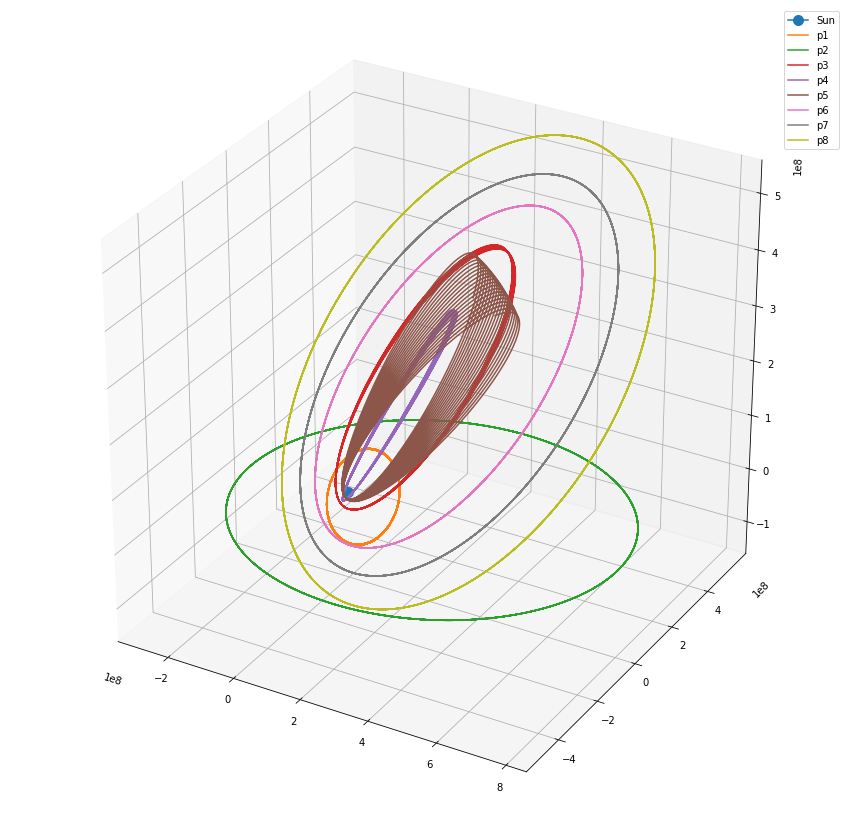

In [7]:
sim.plot_3d()